In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import csv
import numpy as np
import math
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
# Read csv to list
with open('bank-full.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    content = []
    for row in reader:
        content.append(row)
attributes = content[0]
content = content[1:]
print 'Attributes:', attributes
print 'Number of data', len(content)

Attributes: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
Number of data 45211


In [5]:
# Encode data
import calendar
data = []
monthToInt = {v.lower(): k for k,v in enumerate(calendar.month_abbr)}
for row in content:
    thisData = {}
    for i, att in enumerate(row):
        if attributes[i] in set(['age','balance','day','duration','campaign','pdays','previous']):
            thisData[attributes[i]] = int(att)
        elif attributes[i] == 'month': # jan to dec
             thisData[attributes[i]] = int(monthToInt[att])
        elif attributes[i] in ['default', 'housing', 'loan', 'y']: #['yes', 'no']
            thisData[attributes[i]] = 1 if att == 'yes' else 0
        elif attributes[i] == 'job': #['management', 'retired', 'self-employed', 'unknown', 'unemployed', 'housemaid', 'admin.', 'entrepreneur', 'services', 'student', 'technician', 'blue-collar']
            thisData[attributes[i]] = att
        elif attributes[i] == 'marital': #['single', 'married', 'divorced']
            thisData[attributes[i]] = att
        elif attributes[i] == 'education': #['unknown', 'primary', 'tertiary', 'secondary']
            thisData[attributes[i]] = att 
        elif attributes[i] == 'contact':# ['unknown', 'telephone', 'cellular']
            thisData[attributes[i]] = att
        elif attributes[i] == 'poutcome': #['unknown', 'other', 'success', 'failure']
            thisData[attributes[i]] = att
        else:
            print 'error'
    data.append(thisData)

In [6]:
data[0]

{'age': 58,
 'balance': 2143,
 'campaign': 1,
 'contact': 'unknown',
 'day': 5,
 'default': 0,
 'duration': 261,
 'education': 'tertiary',
 'housing': 1,
 'job': 'management',
 'loan': 0,
 'marital': 'married',
 'month': 5,
 'pdays': -1,
 'poutcome': 'unknown',
 'previous': 0,
 'y': 0}

In [82]:
print sum([d['y'] for d in data if d['contact'] == 'unknown'])*1./len([d for d in data if d['contact'] == 'unknown'])
print sum([d['y'] for d in data if d['contact'] == 'telephone'])*1./len([d for d in data if d['contact'] == 'telephone'])
print sum([d['y'] for d in data if d['contact'] == 'cellular'])*1./len([d for d in data if d['contact'] == 'cellular'])

0.0407066052227
0.134205092911
0.14918900461


In [78]:
print sum([d['y'] for d in data if d['job'] == 'management'])*1./len([d for d in data if d['job'] == 'management'])
print sum([d['y'] for d in data if d['job'] == 'retired'])*1./len([d for d in data if d['job'] == 'retired'])
print sum([d['y'] for d in data if d['job'] == 'self-employed'])*1./len([d for d in data if d['job'] == 'self-employed'])

0.137555508564
0.227915194346
0.118429385687


In [77]:
print sum([d['y'] for d in data if d['age'] <= 25])*1./len([d for d in data if d['age'] <= 25])
print sum([d['y'] for d in data if d['age'] >= 60])*1./len([d for d in data if d['age'] >= 60])
print sum([d['y'] for d in data if d['age'] in xrange(26,60)])*1./len([d for d in data if d['age'] in xrange(26,60)])

0.239520958084
0.336322869955
0.105754878656


In [7]:
# Check marital usefulness
print sum([d['y'] for d in data if d['marital'] == 'single'])*1./len([d for d in data if d['marital'] == 'single'])
print sum([d['y'] for d in data if d['marital'] == 'married'])*1./len([d for d in data if d['marital'] == 'married'])
print sum([d['y'] for d in data if d['marital'] == 'divorced'])*1./len([d for d in data if d['marital'] == 'divorced'])

0.149491790461
0.101234658632
0.119454580373


In [8]:
# Check education usefulness
print sum([d['y'] for d in data if d['education'] == 'unknown'])*1./len([d for d in data if d['education'] == 'unknown'])
print sum([d['y'] for d in data if d['education'] == 'primary'])*1./len([d for d in data if d['education'] == 'primary'])
print sum([d['y'] for d in data if d['education'] == 'tertiary'])*1./len([d for d in data if d['education'] == 'tertiary'])
print sum([d['y'] for d in data if d['education'] == 'secondary'])*1./len([d for d in data if d['education'] == 'secondary'])

0.135702746365
0.0862647788644
0.15006390497
0.105594345315


In [9]:
# Check housing usefulness
print sum([d['y'] for d in data if d['housing']])*1./len([d for d in data if d['housing']])
print sum([d['y'] for d in data if not d['housing']])*1./len([d for d in data if not d['housing']])

0.0769996020692
0.167023554604


In [10]:
# Check loan usefulness
print sum([d['y'] for d in data if d['loan']])*1./len([d for d in data if d['loan']])
print sum([d['y'] for d in data if not d['loan']])*1./len([d for d in data if not d['loan']])

0.0668139149641
0.126557273422


In [107]:
# Check outcomes usefulness
print set([d['poutcome'] for d in data])
print sum([d['y'] for d in data if d['poutcome'] == 'success'])*1./len([d for d in data if d['poutcome'] == 'success'])

print sum([d['y'] for d in data if d['poutcome'] == 'failure'])*1./len([d for d in data if d['poutcome'] == 'failure'])


print sum([d['y'] for d in data if d['poutcome'] in ['other', 'unknown']])*1./len([d for d in data if d['poutcome']in ['other', 'unknown']])

# poutcomes = {'unknown':0, 'other':1, 'success':2, 'failure':3}

set(['unknown', 'other', 'success', 'failure'])
0.64725347452
0.126096714956
0.0951828655378


In [17]:
educationDic = {'unknown':0, 'primary':1, 'tertiary':2, 'secondary':3}
def encodeEducation(education):
    feat = [0]*4
    feat[educationDic[education]] = 1
    return feat

In [13]:
maritalDic = {'single':0, 'married':1, 'divorced':2}
def encodeMarital(marital):
    feat = [0]*3
    feat[maritalDic[marital]] = 1
    return feat

In [14]:
jobs = list(set([d['job'] for d in data]))
jobDic = {j:i for i,j in enumerate(jobs)}
def encodeJob(job):
    feat = [0]*len(jobs)
    feat[jobDic[job]] = 1
    return feat

In [83]:
def encodeContact(contact):
    return 1 if contact == 'unknown' else 0

In [15]:
poutcomes = {'unknown':0, 'other':1, 'success':2, 'failure':3}
def encodePoutcome(p):
    feat = [0]*4
    feat[poutcomes[p]] = 1
    return feat

In [16]:
def encodeMonth(m):
    feat = [0]*12
    feat[m-1] = 1
    return feat

In [18]:
def generateFeature(dataset):
    features = []
    for data in dataset:
        feat = [data['duration'], data['campaign'], data['previous'], data['pdays']]+encodePoutcome( data['poutcome']) + encodeMonth(data['month'])
#         feat = [data['age'], data['balance'], data['campaign'], data['duration'], data['housing'],\
#                 data['loan'], data['pdays'], data['previous']]
# # #        + encodePoutcome(data['poutcome']) + encodeEducation(data['education']) + encodeMarital(data['marital']) + encodeJob(data['job'])
#         feat = [data['age'],]
        features.append(feat)
    return np.array(features)

In [19]:
# Split data to 6:2:2
np.random.seed(0)
np.random.shuffle(data)
trainingData = data[:int(len(data)*0.6)]
validationData = data[int(len(data)*0.6):int(len(data)*0.8)]
testData = data[int(len(data)*0.8):]

X_train = generateFeature(trainingData)
y_train = np.array([d['y'] for d in trainingData])
X_validation = generateFeature(validationData)
y_validation = [d['y'] for d in validationData]
X_test = generateFeature(testData)
y_test = [d['y'] for d in testData]

In [20]:
X_train[0]

array([1166,    3,   12,  530,    0,    1,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1,    0])

In [21]:
count_one = sum([d['y'] for d in trainingData])*1./len(trainingData)
count_one

0.11748875617488756

In [36]:
# clf = svm.SGDClassifier(n_iter=100, alpha=0.01)
clf = svm.SVR(C = 0.1)
clf.fit(X_train, y_train) 

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
trainingPredictScore = clf.predict(X_train)
trainingScoreData = zip(trainingPredictScore, y_train)
trainingScoreData.sort(key = lambda x:x[0], reverse = True)
# trainingCorrect = sum([p[0] == p[1] for p in zip(trainingPredict, y_train)])*1./len(X_train)
# trainingMAE = mean_absolute_error(trainingPredict, y_train)
# print trainingCorrect, trainingMAE

In [38]:
# validationPredict = clf.predict(X_validation)
# validationCorrect = sum([p[0] == p[1] for p in zip(validationPredict, y_validation)])*1./len(X_validation)
# validationMAE = mean_absolute_error(validationPredict, y_validation)
# print validationCorrect, validationMAE
validationPredictScore = clf.predict(X_validation)
validationScoreData = zip(validationPredictScore, y_validation)
validationScoreData.sort(key = lambda x:x[0], reverse = True)

In [39]:
validationScoreData

[(0.73856216774106653, 0),
 (0.71065220566264597, 0),
 (0.69578531384810771, 0),
 (0.69038451006007495, 0),
 (0.68925104678229465, 1),
 (0.68408896883591808, 1),
 (0.67712287985884678, 1),
 (0.67347920862574628, 0),
 (0.66772589028541607, 1),
 (0.6585607466049187, 0),
 (0.65687810582733119, 1),
 (0.65151331348557218, 1),
 (0.63051338894069875, 1),
 (0.62783701025730587, 1),
 (0.62449513610289697, 1),
 (0.61072002303824613, 1),
 (0.6006611765773, 0),
 (0.55772940974384366, 0),
 (0.53504561596721989, 1),
 (0.53092800905150539, 0),
 (0.51929483744270244, 1),
 (0.50223611919393518, 1),
 (0.48986765897853779, 0),
 (0.47849098423276037, 0),
 (0.47849098423276037, 0),
 (0.47768894533560935, 1),
 (0.47102731609465553, 0),
 (0.46840705587089476, 0),
 (0.46601749698008943, 0),
 (0.46368087717764511, 0),
 (0.46351301204847772, 1),
 (0.44695849447367747, 1),
 (0.44009451650196674, 1),
 (0.43993238198052853, 1),
 (0.43338399654259774, 1),
 (0.4303550292906908, 1),
 (0.42538094027163587, 1),
 (0.423

In [40]:
def calculatePrecisionAndRecall(retrievedScore, y):
    precision = len(filter(lambda x: x[1] > 0, retrievedScore)) * 1.0 / len(retrievedScore)
    recall = len(filter(lambda x: x[1] > 0, retrievedScore)) * 1.0 / sum(y)
    return precision, recall

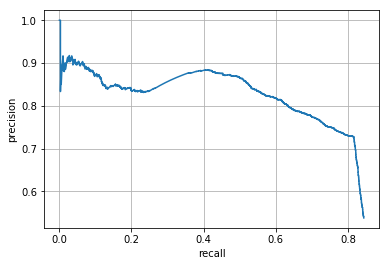

In [41]:
trainPrecisionPath = []
trainRecallPath = []
for i in xrange(1, 5000):
    precision, recall = calculatePrecisionAndRecall(trainingScoreData[:i], y_train)
    trainPrecisionPath.append(precision)
    trainRecallPath.append(recall)
plt.plot(trainRecallPath, trainPrecisionPath)
plt.xlabel("recall")
plt.ylabel("precision")
plt.grid()
# plt.savefig("train_PR.png")

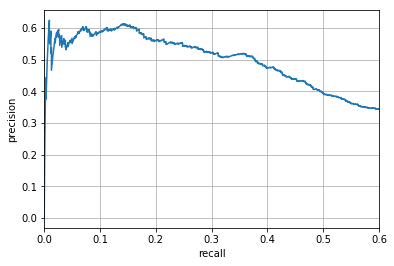

In [44]:
valiPrecisionPath = []
valiRecallPath = []
for i in xrange(1, 2000):
    precision, recall = calculatePrecisionAndRecall(validationScoreData[:i], y_validation)
    valiPrecisionPath.append(precision)
    valiRecallPath.append(recall)
plt.plot(valiRecallPath, valiPrecisionPath)
plt.xlabel("recall")
plt.ylabel("precision")
plt.xlim(0,0.6)
plt.grid()
plt.savefig("vali_PR.png")

In [60]:
# truePositives = len(filter(lambda x: x[0] == x[1] == True, zip(trainingPredict, y_train)))
# print "True Positives:", truePositives
# trueNegatives = len(filter(lambda x: x[0] == x[1] == False, zip(trainingPredict, y_train)))
# print "True Negatives:", trueNegatives
# falsePositives = len(filter(lambda x: x[0] == True and x[1] == False, zip(trainingPredict, y_train)))
# falseNegatives = len(filter(lambda x: x[0] == False and x[1] == True, zip(trainingPredict, y_train)))
# truePositiveRate = truePositives * 1. / (truePositives + falseNegatives)
# trueNegativeRate = trueNegatives * 1. / (trueNegatives + falsePositives)
# balanceErrorRate = 1 - 0.5 * (truePositiveRate + trueNegativeRate)
# print "False Positives:", falsePositives
# print "False Negatives:", falseNegatives
# print "True Positive Rate:", truePositiveRate
# print "True Negative Rate:", trueNegativeRate
# print "Balanced Error Rate:", balanceErrorRate

In [90]:
class MNISTClassification():
    def __init__(self):
        self.stepSize = 1e-3
        self.maxIter = 0
        self.w_jk = None
        self.w_ij = None
        self.numHidden = 60
        self.numClass = 2
        self.epsilon = 1e-2 # for check gradient
        
        self.trainAccuracyPath = []
        self.validationAccuracyPath = []
        self.testAccuracyPath = []
        self.maxValidationAccuracy = -1
        self.w_ijPath = []
        self.w_jkPath = []
        self.preHiddenGradient = 0
        self.preOutputGradient = 0
        self.optimize = False
        
    def fit(self, trainingImgs, trainingLabels,validationImgs, validationLabels, testImgs, testLabels, miniBatch,\
            stepSize = None, T = 1000, checkGradient = False, numHidden = 60, maxIter = 1000, optimize = False):
        self.numHidden = numHidden
        np.random.seed(0)
        w_ij = np.random.normal(0, 0.1, size = (len(trainingImgs[0]), self.numHidden))
        w_jk = np.random.normal(0, 0.1, size = (self.numHidden + 1, self.numClass))
        if optimize:
            w_ij = np.random.normal(0, 1/math.sqrt(len(trainingImgs[0])), size = (len(trainingImgs[0]), self.numHidden))
            w_jk = np.random.normal(0, 1/math.sqrt(self.numHidden), size = (self.numHidden + 1, self.numClass))
        if stepSize:
            self.stepSize = stepSize
        self.optimize = optimize
        
        self.maxIter = maxIter
        
        self.train(trainingImgs, trainingLabels, validationImgs, validationLabels, testImgs, testLabels, w_ij, w_jk, miniBatch,\
                   self.stepSize, T, checkGradient, numHidden)
        
    def predictHidden(self, w_ij, X):
        '''
        X: batch * 784
        w_ij: 784 * j
        return: Z batch * j
        '''
        if self.optimize:
            return 1.7159*np.tanh(2./3.*np.dot(X, w_ij)) # part4
        return 1/(1+np.exp(-np.dot(X, w_ij))) #part3
    
    def predictOutput(self, w_jk, Z):
        '''
        Z: batch * j
        w_jk: j * 10(= k)
        return: prob y batch * 10(=k)
        '''
        expProb = np.exp(np.dot(Z, w_jk))
        probability = expProb/expProb.sum(axis=1)[:,None] # batch * k
        return probability
    
    def loss(self, X, y, t, w_ij, w_jk):
        '''
        X: batch * 784
        y: batch
        w_ij: 784 * j
        w_jk: j * 10(=k)
        '''
        loss = 0
        Z = self.predictHidden(w_ij, X)
        probability = self.predictOutput(w_jk, Z)
        return -np.sum(t*np.log(probability))
    
    def train(self, X, y, validationImgs, validationLabels, testImgs, testLabels, w_ij, w_jk, batch, stepSize, T, checkGradient, numHidden):
        numIter = 0
        start = 0
        stepSize_ini = stepSize
        eta = 0.9 #1/(1+ np.exp(-numIter/250)) # momentum parameter
        # Split validation and training
#         partial = int(math.ceil(len(X)/6.*5.))
#         validationImgs = X[partial:]
#         validationLabels = y[partial:]
#         X = X[:partial]
#         y = y[:partial]
        
        while numIter < self.maxIter:
            stepSize = stepSize_ini * 1./(1 + numIter*1./T) # learning rate
            end = min(start + batch, len(X))
                
            X_batch = X[start: end]
            y_batch = y[start: end]
            
            Z_batch = self.predictHidden(w_ij, X_batch) # batch * j
            Z_batch = np.hstack([np.ones((len(Z_batch),1)), Z_batch]) #  batch * (j+1)(add bias to Z)
            probability = self.predictOutput(w_jk, Z_batch) # batch * 10  
            
            t_batch = np.zeros((len(y_batch), self.numClass)) # batch * 10
            for n in range(0, len(y_batch)):
                t_batch[n, y[n]] = 1
            
            delta_k = t_batch - probability
            
            if self.optimize: # tanh softmax for hiddenlayer
                delta_j = (2./3*(1.7159 - (Z_batch**2)/1.7159)* np.dot(delta_k, w_jk.T))[:,1:]# batch*j #part4
            else:
                delta_j = (Z_batch*(1-Z_batch)*np.dot(delta_k, w_jk.T))[:, 1:] # batch * j #part3 delete
            
            if checkGradient:
                print "Check gradient diff:", self.checkGradient(-delta_j, -delta_k, t_batch, X_batch, y_batch, Z_batch, w_ij, w_jk)
                break
                
            w_ij_update = stepSize / len(X_batch) * np.dot(X_batch.T, delta_j)
            w_jk_update = stepSize / len(X_batch) * np.dot(Z_batch.T, delta_k) 
            
            if self.optimize: # momentum
                w_ij_update += eta*self.preHiddenGradient
                w_jk_update += eta*self.preOutputGradient
                self.preHiddenGradient = w_ij_update
                self.preOutputGradient = w_jk_update
               
            w_ij += w_ij_update
            w_jk += w_jk_update
            start = end
            
            if start >= len(X):
                start = 0
                numIter += 1
                stepSize = stepSize_ini * 1./(1 + numIter*1./T)
                self.trainAccuracyPath.append(self.test(X, y, w_ij, w_jk))
                validationAccuracy = self.test(validationImgs, validationLabels, w_ij, w_jk)
                self.validationAccuracyPath.append(validationAccuracy)
                
                # record the weights where the validation accuracy is maximum
                if validationAccuracy > self.maxValidationAccuracy:
                    self.w_ij = w_ij
                    self.w_jk = w_jk
                    
                    self.maxValidationAccuracy = validationAccuracy
                self.testAccuracyPath.append(self.test(testImgs, testLabels, w_ij, w_jk))
                
                # early stopping
                if len(self.validationAccuracyPath) > 50 and \
                self.validationAccuracyPath[-4] >= self.validationAccuracyPath[-3] >= \
                self.validationAccuracyPath[-2] >= self.validationAccuracyPath[-1]:
                    print "Converge at ", numIter, "final correction rate is", self.testAccuracyPath[-3]
                    break
                    
                if numIter % 10 == 0:
                    print "Number iteration:", numIter,", correction rate:", self.testAccuracyPath[-1]

    def checkGradient(self, hiddenLayerGradient, OutputLayerGradient, t, X, y, Z, w_ij, w_jk):
        # Check w_ij gradient
        hiddenLayerGradient = np.dot(X.T, hiddenLayerGradient)/len(X) # i*j
        gradientDiffWij = np.zeros(hiddenLayerGradient.shape) # i*j
        epsilonMatrix = np.zeros(w_ij.shape)
        for i in range(0, len(w_ij)):
            for j in range(0, len(w_ij[0])):
                epsilonMatrix[i][j] += self.epsilon
                Z1 = self.predictHidden(w_ij + epsilonMatrix, X)
                probability1 = self.predictOutput(w_jk, np.hstack([np.ones((len(Z1),1)), Z1]))
                Z2 = self.predictHidden(w_ij - epsilonMatrix, X)
                probability2 = self.predictOutput(w_jk, np.hstack([np.ones((len(Z2),1)), Z2]))
                E1 = -np.sum(t*np.log(probability1))
                E2 = -np.sum(t*np.log(probability2))
                gradientDiffWij[i][j] = abs(hiddenLayerGradient[i][j] - (E1-E2)/2/self.epsilon)
                epsilonMatrix[i][j] -= self.epsilon
        # check w_jk gradient
        epsilonMatrix = np.zeros(w_jk.shape)
        OutputLayerGradient = np.dot(Z.T, OutputLayerGradient)/len(Z) # j*k
        gradientDiffWjk = np.zeros(OutputLayerGradient.shape) # j*k
        for j in range(0, len(w_jk)):
            for k in range(0, len(w_jk[0])):
                epsilonMatrix[j][k] += self.epsilon
                probability1 = self.predictOutput(w_jk + epsilonMatrix, Z)
                probability2 = self.predictOutput(w_jk - epsilonMatrix, Z)
                E1 = -np.sum(t*np.log(probability1))
                E2 = -np.sum(t*np.log(probability2))
                gradientDiffWjk[j][k] = abs(OutputLayerGradient[j][k] - (E1-E2)/2/self.epsilon)
                epsilonMatrix[j][k] -= self.epsilon

        return np.mean(gradientDiffWij), np.mean(gradientDiffWjk), np.max(gradientDiffWij), np.max(gradientDiffWjk)
    
    def test(self, X, y, w_ij, w_jk):
        Z = self.predictHidden(w_ij, X)
        probability = self.predictOutput(w_jk, np.hstack([np.ones((len(Z),1)), Z]))
        predict = np.argmax(probability, axis=1) # batch
        match = filter(lambda x: x[0] == x[1], zip(predict, y))
        return len(match)*1.0/len(y)

In [91]:
mn = MNISTClassification()
mn.fit(X_train, y_train, X_test, y_test,X_validation, y_validation,  60000, 0.01, T = 50, numHidden = 10, maxIter = 200, optimize = True)

Number iteration: 10 , correction rate: 0.78599867286
Number iteration: 20 , correction rate: 0.857664233577
Number iteration: 30 , correction rate: 0.873921698739
Number iteration: 40 , correction rate: 0.867175403672
Number iteration: 50 , correction rate: 0.869387303694
Number iteration: 60 , correction rate: 0.873258128733
Number iteration: 70 , correction rate: 0.878345498783
Number iteration: 80 , correction rate: 0.881552753816
Converge at  85 final correction rate is 0.881663348817
